### What is Computer Vision?
Computer vision is type of artificial intelligence that enable computer to analysis and understand the images and videos. Computer Vision used machine learning and deep learning algorithn to perform tasks like object dectections and image classification.

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2025-03-06 17:59:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.207, 74.125.130.207, 74.125.68.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.3MB/s    in 5.6s    

2025-03-06 17:59:31 (18.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
from zipfile import ZipFile
with ZipFile("/content/pizza_steak.zip", "r") as zip_ref:
  zip_ref.extractall()

In [ ]:
!ls /content/pizza_steak

test  train


In [ ]:
!ls /content/pizza_steak/train


pizza  steak


In [ ]:
!ls /content/pizza_steak/train/steak/1000205.jpg

/content/pizza_steak/train/steak/1000205.jpg


In [ ]:
from pathlib import Path
import numpy as np
from PIL import Image
import os
import random
import matplotlib.pyplot as plt

In [ ]:
for dirpath,dirname,filenames in os.walk("/content/pizza_steak"):
  print(f"There are {dirname} directories and {len(filenames)} images in '{dirpath}'.")

There are ['test', 'train'] directories and 0 images in '/content/pizza_steak'.
There are ['pizza', 'steak'] directories and 0 images in '/content/pizza_steak/test'.
There are [] directories and 250 images in '/content/pizza_steak/test/pizza'.
There are [] directories and 250 images in '/content/pizza_steak/test/steak'.
There are ['pizza', 'steak'] directories and 0 images in '/content/pizza_steak/train'.
There are [] directories and 750 images in '/content/pizza_steak/train/pizza'.
There are [] directories and 750 images in '/content/pizza_steak/train/steak'.


In [ ]:
print("train_steak",len(os.listdir("/content/pizza_steak/train/steak")))
print("train_pizza",len(os.listdir("/content/pizza_steak/train/pizza")))

train_steak 750
train_pizza 750


## Get dynamic class name

In [ ]:
os.listdir("/content/pizza_steak/train")

['pizza', 'steak']

In [ ]:
data_dir = Path("/content/pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


['pizza' 'steak']


In [ ]:
# import matplotlib.pyplot as plt
# plt.imshow(plt.imread("/content/pizza_steak/train/steak/1000205.jpg"))
# plt.show()

In [ ]:
from IPython.display import clear_output
def view_random_image(dir,target_class):
  path = f'{dir}{target_class}'
  image  = random.sample(os.listdir(path),1)[0]
  img = np.asarray(Image.open(f'{path}/{image}'))

  # Clear the previous output
  clear_output(wait=True)
  print(path)

  print(img.shape)
  plt.imshow(img)
  plt.title(f"Class: {target_class}")
  plt.axis(False)
  plt.show()
  return img


/content/pizza_steak/train/steak
(512, 512, 3)


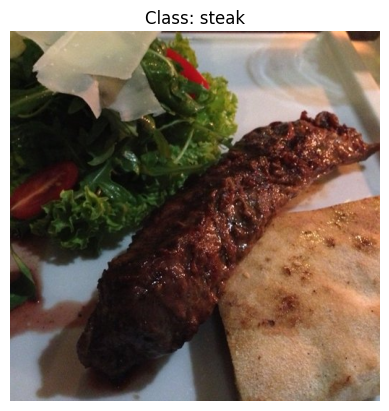

In [ ]:
img = view_random_image("/content/pizza_steak/train/","steak")


/content/pizza_steak/train/pizza
(512, 383, 3)


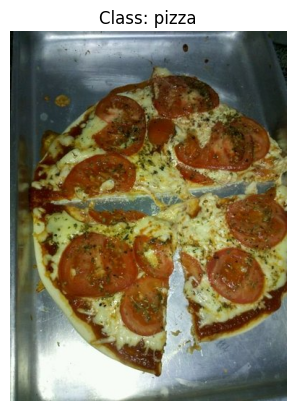

In [ ]:

# automaticaly check image after every 4 second
from time import sleep
for x in range(10):
  view_random_image("/content/pizza_steak/train/","pizza")
  sleep(4)


In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[142, 126,  75],
        [133, 117,  66],
        [126, 110,  61],
        ...,
        [ 56,  38,  28],
        [ 58,  38,  27],
        [ 61,  41,  30]],

       [[141, 125,  74],
        [136, 120,  69],
        [131, 115,  66],
        ...,
        [ 56,  38,  26],
        [ 57,  37,  26],
        [ 59,  39,  28]],

       [[140, 124,  72],
        [138, 122,  70],
        [137, 121,  70],
        ...,
        [ 57,  37,  26],
        [ 60,  40,  29],
        [ 59,  40,  26]],

       ...,

       [[160, 163, 172],
        [158, 161, 170],
        [158, 161, 170],
        ...,
        [147, 159, 171],
        [151, 163, 177],
        [155, 168, 184]],

       [[156, 159, 168],
        [157, 160, 169],
        [158, 161, 170],
        ...,
        [147, 161, 174],
        [149, 165, 181],
        [152, 168, 184]],

       [[156, 159, 168],
        [157, 160, 169],
        [159, 162, 171],
        ...,
        [146, 162, 17

### Normalization Of image using Rescaling layer in the range of 0 and 1

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
# this layer is used for the normailization of the images

In [ ]:
normalization_layer(img)

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[0.5568628 , 0.49411768, 0.29411766],
        [0.52156866, 0.45882356, 0.25882354],
        [0.49411768, 0.43137258, 0.2392157 ],
        ...,
        [0.21960786, 0.14901961, 0.10980393],
        [0.227451  , 0.14901961, 0.10588236],
        [0.2392157 , 0.16078432, 0.11764707]],

       [[0.5529412 , 0.4901961 , 0.2901961 ],
        [0.53333336, 0.47058827, 0.27058825],
        [0.5137255 , 0.45098042, 0.25882354],
        ...,
        [0.21960786, 0.14901961, 0.10196079],
        [0.22352943, 0.14509805, 0.10196079],
        [0.23137257, 0.15294118, 0.10980393]],

       [[0.54901963, 0.48627454, 0.28235295],
        [0.5411765 , 0.4784314 , 0.27450982],
        [0.5372549 , 0.47450984, 0.27450982],
        ...,
        [0.22352943, 0.14509805, 0.10196079],
        [0.23529413, 0.15686275, 0.1137255 ],
        [0.23137257, 0.15686275, 0.10196079]],

       ...,

       [[0.627451  , 0.6392157 , 0.6745098 ],
        [0.61

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# set the seed
tf.random.set_seed(42)

# preprocess data and get the value in the range of 0 and 1
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)


# setup the path
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"


# flow_from_directory(
#     directory,
#     target_size=(256, 256),
#     color_mode='rgb',
#     classes=None,
#     class_mode='categorical',
#     batch_size=32,
#     shuffle=True,
#     seed=None,
#     save_to_dir=None,
#     save_prefix='',
#     save_format='png',
#     follow_links=False,
#     subset=None,
#     interpolation='nearest',
#     keep_aspect_ratio=False
# )

# import data from directories and trun into batches
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="binary",
    seed=42,
    )
valid_data = valid_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="binary",
    seed=42,
    )




Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:

# next(train_data)

In [ ]:
valid_data.batch_size

32

In [ ]:
valid_data.class_indices

{'pizza': 0, 'steak': 1}

In [ ]:
print("train_image shape:",train_data.image_shape)
print("test_image shape", valid_data.image_shape)

train_image shape: (224, 224, 3)
test_image shape (224, 224, 3)


### Create CNN Model Architechture VGG-16



In [ ]:
# create a ann model
model1 = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(224, 224,3)),
        # two convolutional layers with ten filter/kernel and kernel size is 3 after performation convolution process we get the map features
      tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
        # tf.keras.layers.Conv2D(10,3,activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),

        tf.keras.layers.Conv2D(10,3,activation="relu"),
        # tf.keras.layers.Conv2D(10,3,activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),

        # ANN
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1,activation="sigmoid")

    ]
)

model1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)


history = model1.fit(
    train_data,
    epochs=5,
    # steps_per_epoch=len(train_data),
    validation_data=valid_data,
    # validation_steps=len(valid_data)
    )



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 174ms/step - accuracy: 0.6498 - loss: 0.6369 - val_accuracy: 0.8340 - val_loss: 0.4159
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.8147 - loss: 0.4378 - val_accuracy: 0.8480 - val_loss: 0.3875
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.8249 - loss: 0.3893 - val_accuracy: 0.8560 - val_loss: 0.3548
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.8724 - loss: 0.3352 - val_accuracy: 0.8780 - val_loss: 0.3227
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.9011 - loss: 0.2677 - val_accuracy: 0.8740 - val_loss: 0.3213


In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 29160)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          29,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,055 (355.69 KB)

 Trainable params: 30,351 (118.56 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 60,704 (237.13 KB)

In [ ]:
len(train_data)

47

<Axes: >

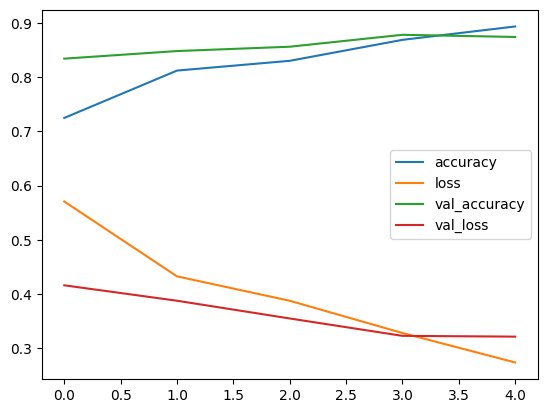

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()



In [ ]:
train_data.image_shape

(224, 224, 3)

### Experiment: Apply ANN on image Dataset

let's see artificial neural network are work with image data.


In [ ]:
train_data.class_indices

{'pizza': 0, 'steak': 1}

In [ ]:
len(train_data.labels)

1500

In [ ]:
train_data.color_mode

'rgb'

In [ ]:
tf.random.set_seed(42)
model2 = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(224, 224,3)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation="relu"),
        tf.keras.layers.Dense(64,activation="relu"),
        tf.keras.layers.Dense(32,activation="relu"),
        tf.keras.layers.Dense(1,activation="sigmoid")

    ]
)

model2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)


model2_history = model2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    # validation_steps=len(valid_data))
)



Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 156ms/step - accuracy: 0.5714 - loss: 0.7650 - val_accuracy: 0.5500 - val_loss: 0.7239
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.6926 - loss: 0.5686 - val_accuracy: 0.7140 - val_loss: 0.5735
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.7760 - loss: 0.5038 - val_accuracy: 0.7660 - val_loss: 0.5093
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.7603 - loss: 0.5142 - val_accuracy: 0.7520 - val_loss: 0.5447
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.7634 - loss: 0.4930 - val_accuracy: 0.7840 - val_loss: 0.4522


In [ ]:
model2.evaluate(valid_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.7366 - loss: 0.5160


[0.49864649772644043, 0.7599999904632568]

In [ ]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      19,267,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,278,083 (73.54 MB)

 Trainable params: 19,278,081 (73.54 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
  model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 29160)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          29,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,055 (355.69 KB)

 Trainable params: 30,351 (118.56 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 60,704 (237.13 KB)